In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# Thanks for the tutorial from Belle's code honestly...

In [27]:
df = pd.read_csv (r'~/Desktop/cleaned_dataset.csv')
print (df)

             Id ActivityDate  TotalSteps  TotalDistance  \
0    1503960366    4/12/2016       13162       8.500000   
1    1503960366    4/13/2016       10735       6.970000   
2    1503960366    4/14/2016       10460       6.740000   
3    1503960366    4/15/2016        9762       6.280000   
4    1503960366    4/16/2016       12669       8.160000   
..          ...          ...         ...            ...   
889  8877689391     5/8/2016       10686       8.110000   
890  8877689391     5/9/2016       20226      18.250000   
891  8877689391    5/10/2016       10733       8.150000   
892  8877689391    5/11/2016       21420      19.559999   
893  8877689391    5/12/2016        8064       6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44     

In [47]:
# to set the random_state so the split among test/training is the same every time
train, test = train_test_split(df, test_size=0.2, random_state=42)

print("Shape of full dataset is: {0}".format(df.shape))
print("Shape of training dataset is: {0}".format(train.shape))
print("Shape of test dataset is: {0}".format(test.shape))

Shape of full dataset is: (894, 14)
Shape of training dataset is: (715, 14)
Shape of test dataset is: (179, 14)


In [49]:
# First set of train/test. Make predictors be Total Distance, Very Active Minutes, Very Active Distance, Light Active Distance
# Excluding total steps because correlation is .98 with Total Distance.
# Note, though that the correlation between a lot of the predictors is moderate-strong. Multi-collinearity could be an issue.

X_train_1 = train[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance', 'LightActiveDistance']]
Y_train_1 = train['Calories']

X_test_1 = test[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance', 'LightActiveDistance']]
Y_test_1 = test['Calories']

In [35]:
m1 = LinearRegression()
m1.fit(X_train_1, Y_train_1)
m1_pred = m1.predict(X_test_1)

print('Intercept: \n', m1.intercept_)
print('Coefficients: \n', m1.coef_)

Intercept: 
 1545.8111018319664
Coefficients: 
 [  80.25872372   13.80367586 -112.42391389   53.70884301]


In [74]:
print("MSE for test:", mean_squared_error(m1_pred, Y_test_1)) 
print("R^2 for test:", m1.score(X_test_1, Y_test_1))

print("MSE for training:", mean_squared_error(Y_train_1, regression.predict(X_train_1))) 
print("R^2 for training:", m1.score(X_train_1, Y_train_1))

MSE for test: 654518.7413063645
R^2 for test: 0.44175905290220197
MSE for training: 229477.09531131337
R^2 for training: 0.5551781262984622


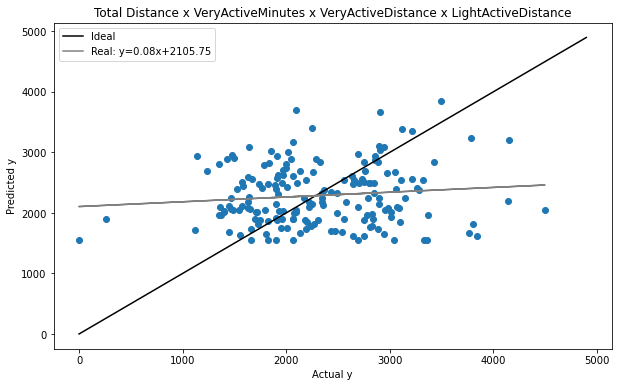

In [75]:
# actual y vs. predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test_1, m1_pred, 'o')
grid0 = np.linspace(np.min(df.Calories), np.max(df.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance x VeryActiveMinutes x VeryActiveDistance x LightActiveDistance")

# Best fit line line

m, b = np.polyfit(Y_test_1, m1_pred, 1)
ax.plot(Y_test_1, m*Y_test_1 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

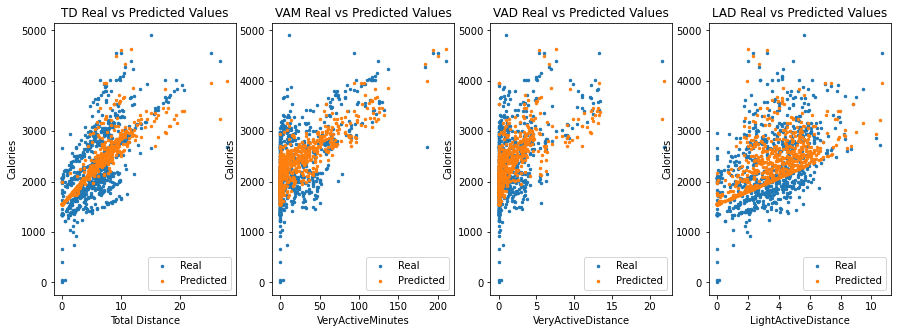

In [81]:
# Plotting the data for the four different predictors

Y_predict = regression.predict(X_train_1)

fig, ax = plt.subplots(1,4, figsize=(15,5))
ax[0].scatter(X_train_1['TotalDistance'], Y_train_1, s = 6, label = "Real")
ax[0].scatter(X_train_1['TotalDistance'], Y_predict, s = 6, label = "Predicted")
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel('Calories')
ax[0].set_title('TD Real vs Predicted Values')
ax[0].legend()

ax[1].scatter(X_train_1['VeryActiveMinutes'], Y_train_1, s = 6, label = "Real")
ax[1].scatter(X_train_1['VeryActiveMinutes'], Y_predict, s = 6, label = "Predicted")
ax[1].set_xlabel('VeryActiveMinutes')
ax[1].set_ylabel('Calories')
ax[1].set_title('VAM Real vs Predicted Values')
ax[1].legend()

ax[2].scatter(X_train_1['VeryActiveDistance'], Y_train_1, s = 6, label = "Real")
ax[2].scatter(X_train_1['VeryActiveDistance'], Y_predict, s = 6, label = "Predicted")
ax[2].set_xlabel('VeryActiveDistance')
ax[2].set_ylabel('Calories')
ax[2].set_title('VAD Real vs Predicted Values')
ax[2].legend()

ax[3].scatter(X_train_1['LightActiveDistance'], Y_train_1, s = 6, label = "Real")
ax[3].scatter(X_train_1['LightActiveDistance'], Y_predict, s = 6, label = "Predicted")
ax[3].set_xlabel('LightActiveDistance')
ax[3].set_ylabel('Calories')
ax[3].set_title('LAD Real vs Predicted Values')
ax[3].legend()

In [83]:
# Making the Second Combination

X_train_2 = train[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance', 'FairlyActiveMinutes']]
Y_train_2 = train['Calories']

X_test_2 = test[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance', 'FairlyActiveMinutes']]
Y_test_2 = test['Calories']

In [84]:
# Fitting second models

m2 = LinearRegression()
m2.fit(X_train_2, Y_train_2)
m2_pred = m1.predict(X_test_2)

print('Intercept: \n', m2.intercept_)
print('Coefficients: \n', m2.coef_)

Intercept: 
 1532.7219983877435
Coefficients: 
 [ 139.45698473   14.57617042 -169.70304627   -4.05559203]


In [88]:
print("MSE for test:", mean_squared_error(m2_pred, Y_test_2)) 
print("R^2 for test:", m2.score(X_test_2, Y_test_2))

print("MSE for training:", mean_squared_error(Y_train_2, regression.predict(X_train_2))) 
print("R^2 for training:", m2.score(X_train_2, Y_train_2))

MSE for test: 2108348.304122093
R^2 for test: 0.4620130535992164
MSE for training: 1702241.7681527718
R^2 for training: 0.5594306297001687


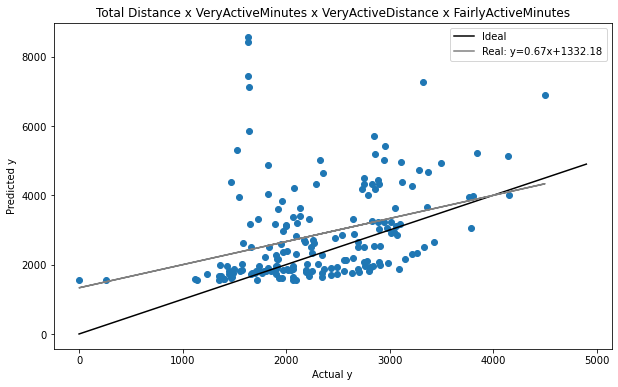

In [85]:
# Actual y vs. Predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test_2, m2_pred, 'o')
grid0 = np.linspace(np.min(df.Calories), np.max(df.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance x VeryActiveMinutes x VeryActiveDistance x FairlyActiveMinutes")

# Best fit line line

m, b = np.polyfit(Y_test_2, m2_pred, 1)
ax.plot(Y_test_2, m*Y_test_2 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

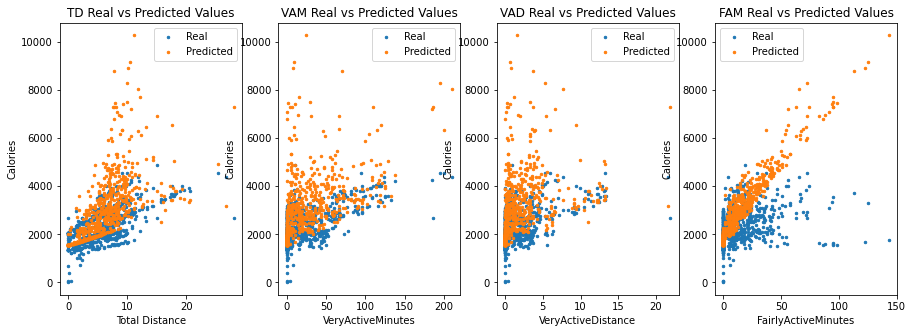

In [89]:
# Plotting the data for the four different predictors

Y_predict_2 = regression.predict(X_train_2)

fig, ax = plt.subplots(1,4, figsize=(15,5))
ax[0].scatter(X_train_2['TotalDistance'], Y_train_2, s = 6, label = "Real")
ax[0].scatter(X_train_2['TotalDistance'], Y_predict_2, s = 6, label = "Predicted")
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel('Calories')
ax[0].set_title('TD Real vs Predicted Values')
ax[0].legend()

ax[1].scatter(X_train_2['VeryActiveMinutes'], Y_train_2, s = 6, label = "Real")
ax[1].scatter(X_train_2['VeryActiveMinutes'], Y_predict_2, s = 6, label = "Predicted")
ax[1].set_xlabel('VeryActiveMinutes')
ax[1].set_ylabel('Calories')
ax[1].set_title('VAM Real vs Predicted Values')
ax[1].legend()

ax[2].scatter(X_train_2['VeryActiveDistance'], Y_train_2, s = 6, label = "Real")
ax[2].scatter(X_train_2['VeryActiveDistance'], Y_predict_2, s = 6, label = "Predicted")
ax[2].set_xlabel('VeryActiveDistance')
ax[2].set_ylabel('Calories')
ax[2].set_title('VAD Real vs Predicted Values')
ax[2].legend()

ax[3].scatter(X_train_2['FairlyActiveMinutes'], Y_train_2, s = 6, label = "Real")
ax[3].scatter(X_train_2['FairlyActiveMinutes'], Y_predict_2, s = 6, label = "Predicted")
ax[3].set_xlabel('FairlyActiveMinutes')
ax[3].set_ylabel('Calories')
ax[3].set_title('FAM Real vs Predicted Values')
ax[3].legend()

In [95]:
# First set of train/test. Make predictors be Total Distance, Very Active Minutes, Very Active Distance, Light Active Distance
# Excluding total steps because correlation is .98 with Total Distance.
# Note, though that the correlation between a lot of the predictors is moderate-strong. Multi-collinearity could be an issue.

X_train_3 = train[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance', 'LoggedActivitiesDistance']]
Y_train_3 = train['Calories']

X_test_3 = test[['TotalDistance', 'VeryActiveMinutes', 'VeryActiveDistance', 'LoggedActivitiesDistance']]
Y_test_3 = test['Calories']

In [96]:
# Fitting 3rd models

m3 = LinearRegression()
m3.fit(X_train_3, Y_train_3)
m3_pred = m1.predict(X_test_3)

print('Intercept: \n', m3.intercept_)
print('Coefficients: \n', m3.coef_)

Intercept: 
 1558.2651910905574
Coefficients: 
 [ 122.10237414   13.40305533 -144.64820623   21.49919829]


In [97]:
print("MSE for test:", mean_squared_error(m3_pred, Y_test_3)) 
print("R^2 for test:", m3.score(X_test_3, Y_test_3))

print("MSE for training:", mean_squared_error(Y_train_3, regression.predict(X_train_3))) 
print("R^2 for training:", m3.score(X_train_3, Y_train_3))

MSE for test: 317626.7345711767
R^2 for test: 0.4405834964478933
MSE for training: 277567.57624906907
R^2 for training: 0.5514977954424873


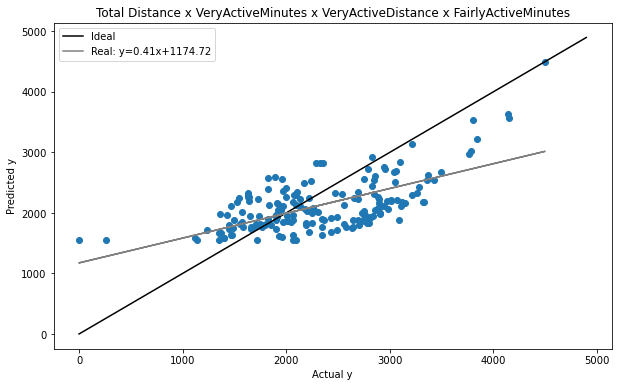

In [98]:
# Actual y vs. Predicted y

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(Y_test_3, m3_pred, 'o')
grid0 = np.linspace(np.min(df.Calories), np.max(df.Calories), 100)
ax.plot(grid0, grid0, color='black', label="Ideal") # 45 degree line
ax.set_xlabel("Actual y")
ax.set_ylabel("Predicted y")
ax.set_title("Total Distance x VeryActiveMinutes x VeryActiveDistance x FairlyActiveMinutes")

# Best fit line line

m, b = np.polyfit(Y_test_3, m3_pred, 1)
ax.plot(Y_test_3, m*Y_test_3 + b, color='grey', label=f'Real: y={m:.2f}x+{b:.2f}')

ax.legend()

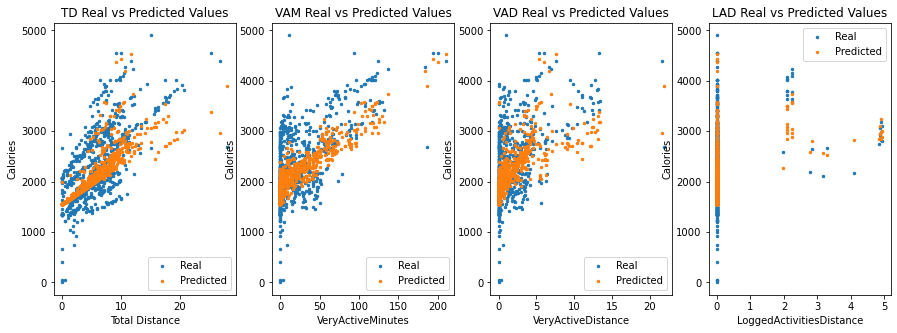

In [99]:
# Plotting the data for the four different predictors

Y_predict_3 = regression.predict(X_train_3)

fig, ax = plt.subplots(1,4, figsize=(15,5))
ax[0].scatter(X_train_3['TotalDistance'], Y_train_3, s = 6, label = "Real")
ax[0].scatter(X_train_3['TotalDistance'], Y_predict_3, s = 6, label = "Predicted")
ax[0].set_xlabel('Total Distance')
ax[0].set_ylabel('Calories')
ax[0].set_title('TD Real vs Predicted Values')
ax[0].legend()

ax[1].scatter(X_train_3['VeryActiveMinutes'], Y_train_3, s = 6, label = "Real")
ax[1].scatter(X_train_3['VeryActiveMinutes'], Y_predict_3, s = 6, label = "Predicted")
ax[1].set_xlabel('VeryActiveMinutes')
ax[1].set_ylabel('Calories')
ax[1].set_title('VAM Real vs Predicted Values')
ax[1].legend()

ax[2].scatter(X_train_3['VeryActiveDistance'], Y_train_3, s = 6, label = "Real")
ax[2].scatter(X_train_3['VeryActiveDistance'], Y_predict_3, s = 6, label = "Predicted")
ax[2].set_xlabel('VeryActiveDistance')
ax[2].set_ylabel('Calories')
ax[2].set_title('VAD Real vs Predicted Values')
ax[2].legend()

ax[3].scatter(X_train_3['LoggedActivitiesDistance'], Y_train_3, s = 6, label = "Real")
ax[3].scatter(X_train_3['LoggedActivitiesDistance'], Y_predict_3, s = 6, label = "Predicted")
ax[3].set_xlabel('LoggedActivitiesDistance')
ax[3].set_ylabel('Calories')
ax[3].set_title('LAD Real vs Predicted Values')
ax[3].legend()